# Unified Plotting

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../../old_notebooks")
sys.path.append("../../../")

In [2]:
pi0scaling = {"val": 0, "suffix": "", "title": "No pi0 Scaling"} #no scaling
#pi0scaling = {"val": 1, "suffix": "_pi0flat", "title": "0.759 pi0 Scaling"} #flat scaling
#pi0scaling = {"val": 2, "suffix": "_pi0e040", "title": r"$\pi^0$ scaling: [$1 - 0.40 \times E_\pi$]"} #energy-dependent


In [3]:
from matplotlib import pyplot as plt

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

from load_data_run123 import *
from unblinding_far_sideband import *

In [4]:
import sys
import localSettings as ls
print(ls.main_path)
print(ls.ntuple_path)
main_path = ls.main_path
sys.path.append(main_path)

/uboone/app/users/cthorpe/RefactoredPELEE/
/uboone/data/users/cthorpe/PELEE/


In [5]:
import scipy.stats

In [6]:
#which_sideband = ['np_far'       ,"farsideband"] # far-sideband 1eNp datasets
#which_sideband = ['0p_far'       ,"farsideband"] # far-sideband 1eNp datasets
#which_sideband = ['numu',"numu"] # numu NTuples [v41]
#which_sideband = ['2plus_showers',"farsideband"] # far-sideband 2+ shower datasets
#which_sideband = ['np_sb_comb',"farsideband"] # combined far-sideband 1eNp and 2+ shower datasets
#which_sideband = ['opendata'     ,'opendata']    # open datasets (5e19 / 1e19)
#which_sideband = ['opendata'     ,'fakeset1']    # set1 fake dataset
which_sideband = ['fulldata'     ,'fulldata']    # full data
#which_sideband = ['run4opendata','run4opendata']
#which_sideband = ['fulldatawrun4open','fulldatawrun4open']
data_to_load=[3]
DrawData = False

In [8]:
samples = load_data_run123(which_sideband=which_sideband[0],
                           return_plotter=False,
                           pi0scaling=pi0scaling["val"],
                           loadpi0variables=True,
                           loadtruthfilters=False,
                           loadshowervariables=True,
                           loadnumuntuples=True,
                           loadnumuvariables=False,
                           loadfakedata=0,
                           USEBDT=True,
                           loadsystematics=True,
                           loadrecoveryvars=True,
                           runs_to_load=data_to_load)


Getting Variables!
loading data and mc from runs [3]
Loading uproot files
Loading run 3 uproots!!
Done loading run 3 uproots
Loading Run3 dataframes
Check 0
10290


../../../old_notebooks/load_data_run123.py:262: RuntimeWarning: invalid value encountered in true_divide
  df['proton_pz'] = np.where((mc_E_prot>0),mc_pz_prot/mc_p_prot,-9999.)


Finished loading dataframes
Concatenate dataframes
Concantating the various dataframes based on value of which_sideband
Check 1
10290
Check 2
10290
Add derived variables
Check 3
10290
Check 4
10290
Check 5
10290
Check 6
10290
Add BDT scores
Check 6.1
10290
Check 6.2
10290
Check 6.3
10290
Check 6.4
10290
Check 6.5
10290
Check 6.6
10184
Check 7
10184
Check 8
10184


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Check 9
10184
Check 10
10184
Check 10.5
10184
Check 11
10184
Check 12
10184
Check 13
10184
Done!


In [22]:
print(len(samples["ext"]))


10184


NameError: name 'weights' is not defined

In [10]:
import plotter
import unblinding_far_sideband
import importlib
importlib.reload(plotter)
importlib.reload(unblinding_far_sideband)

<module 'unblinding_far_sideband' from '../../../old_notebooks/unblinding_far_sideband.py'>

In [24]:
plotter_runbyrun = {}
for run in [3]:#, 2, 3, 123, 12,4,1234]:
    print(run)
    this_weights, this_pot = get_weights(run,dataset=which_sideband[1])
    plotter_runbyrun[run] = plotter.Plotter(samples, this_weights, pot=this_pot)
    if (run==123): print(this_weights)
    print(this_weights["ext"])

3
Loading data for dataset fulldata run 3
Setting ext scaling
61381194 205802114
0.29825346692016974


In [12]:
TRAINVAR = ["shr_score","tksh_distance","tksh_angle",
            "shr_tkfit_dedx_max",
            "trkfit","trkpid",
            "subcluster","shrmoliereavg",
            "trkshrhitdist2","hits_ratio",
            "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y",
            "CosmicIPAll3D","CosmicDirAll3D"]

pvaluetypes = ['pvalue','pvaluediag','pvaluestatonly']

In [13]:
#DETSYS = {'mc':True,'nue':True,'ccpi0':True,'ncpi0':True,'dirt':True,\
#          'ncnopi':True,'nccpi':True,'ncpi0':True,'ccpi0':True}

DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

0.29825346692016974


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


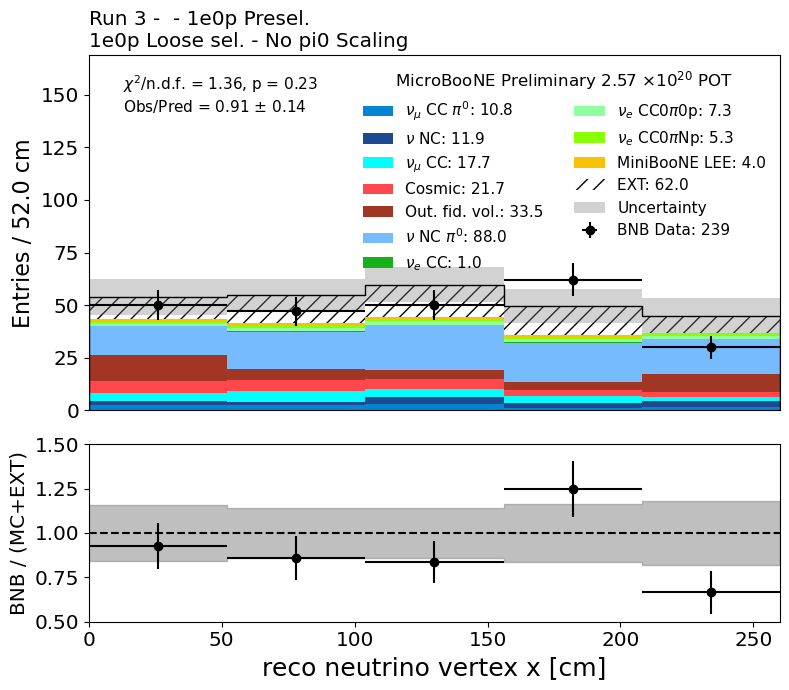

In [21]:
from unblinding_far_sideband import *
from microfit import variable_definitions as vdef    

# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'None' #'None'
pre_key = 'ZP'
sel_key = 'ZPLOOSESEL'
run = 3
variables = vdef.vtx_variables

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
#    if run in [1, 2, 3, 12,4]:
#        QUERY += f' and run{run}==True'
        
#formatting can be improved..
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text
    
#print(samples["ext"].query(QUERY,engine="python"))
        
for binning_def in variables:    
    
    VARIABLE, BINS, RANGE, XTIT = binning_def[0],binning_def[1],binning_def[2],binning_def[3]
    
    fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="paper_category",
        draw_sys=True,
        detsysdict=DETSYS,
        DETSYSPATH=DETSYSPATH,
        COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
        ratio=True,
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE,
        chisq=True,
        draw_data=True
        #asymErrs=True
    )[0:3]

    ax1.set_title(TITLE, loc='left')
    ax1.set_ylim(0., ax1.get_ylim()[1]*2.3)

    plt.tight_layout()

    # fix position of chi2 wrt legend
    plt.draw()
    legleft = (ax1.get_legend().get_window_extent().x0 < 100)
    if legleft:
        for a in ax1.get_children(): 
            if len(a.findobj(match=plt.Text))==0: continue
            txt = a.findobj(match=plt.Text)[0]
            if 'n.d.f.' not in txt.get_text(): continue
            #print(txt.get_text())
            txt.set_x(0.80)
    # END - fix position of chi2 wrt legend

    fig.show()
    break